# Clase Métricas 
- Fecha: 23 de abril de 2025

In [2]:
import pandas as pd

Clase_objetivo='Neg'

real=pd.Series(['Pos','Pos','Neg','Neg','Neg','Pos','Pos','Pos','Pos','Pos','Neg','Pos','Neg','Pos','Neg'])

hipotesis=(['Pos','Neg','Neg','Neg','Pos','Pos','Pos','Neg','Neg','Pos','Pos','Neg','Neg','Neg','Pos'])


df = pd.DataFrame(real, columns=['real'])
df['hipotesis'] = hipotesis
df

,real,hipotesis
0,Pos,Pos
1,Pos,Neg
2,Neg,Neg
3,Neg,Neg
4,Neg,Pos
5,Pos,Pos
6,Pos,Pos
7,Pos,Neg
8,Pos,Neg
9,Pos,Pos


## Accuracy

In [3]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(real, hipotesis))

Accuracy:  0.4666666666666667


## Matriz de confusión 

In [4]:
from sklearn.metrics import confusion_matrix
# Clases ordenadas alfabeticamente 
cm= confusion_matrix(real, hipotesis, labels=['Pos', 'Neg'])
# No se puede interpretar tan facilmente 
# Por esto primero se indica el target
cm


array([[4, 5],
       [3, 3]], dtype=int64)

In [5]:
# Asumiendo que la clase objetivo era la que estuviera por defecto.
confusion_matrix(real, hipotesis, labels=['Neg', 'Pos'])

array([[3, 3],
       [5, 4]], dtype=int64)

In [6]:
print('TPs: ', cm[0, 0])
print('FNs: ', cm[0, 1])
print('FPs: ', cm[1, 0])
print('TNs: ', cm[1, 1])

TPs:  4
FNs:  5
FPs:  3
TNs:  3


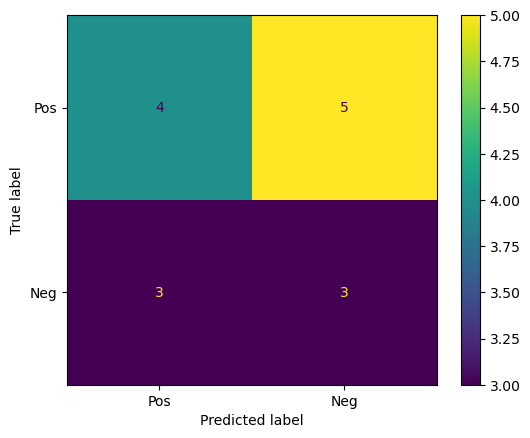

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm, display_labels=['Pos', 'Neg'])
cmd.plot()

## Otras metricas: Precision, Recall y F1 Score

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Clase pos
print("Resultados clase pos")
print('Precision: ', precision_score(real, hipotesis, pos_label='Pos'))
print("Recall: ", recall_score(real, hipotesis, pos_label='Pos'))
print("F1_Score: ", f1_score(real, hipotesis, pos_label='Pos'))

Resultados clase pos
Precision:  0.5714285714285714
Recall:  0.4444444444444444
F1_Score:  0.5


In [9]:
# Clase Neg
print("Resultados clase Neg")
print('Precision: ', precision_score(real, hipotesis, pos_label='Neg'))
print("Recall: ", recall_score(real, hipotesis, pos_label='Neg'))
print("F1_Score: ", f1_score(real, hipotesis, pos_label='Neg'))

Resultados clase Neg
Precision:  0.375
Recall:  0.5
F1_Score:  0.42857142857142855


## Para ambas clases promedio simple
-No se necesita especificar la clase objetivo

In [10]:
# Promedio simple
print("Resultados promedio simple")
print('Precision: ', precision_score(real, hipotesis, average='macro'))
print("Recall: ", recall_score(real, hipotesis, average='macro'))
print("F1_Score: ", f1_score(real, hipotesis, average='macro'))

Resultados promedio simple
Precision:  0.4732142857142857
Recall:  0.4722222222222222
F1_Score:  0.4642857142857143


## Ambas clases con promedio ponderado
 -No se necesita especificar la clase objetivo

In [11]:
# Promedio ponderado
print("Resultados promedio ponderado")
print('Precision: ', precision_score(real, hipotesis, average='weighted'))
print("Recall: ", recall_score(real, hipotesis, average='weighted'))
print("F1_Score: ", f1_score(real, hipotesis, average='weighted'))

Resultados promedio ponderado
Precision:  0.4928571428571428
Recall:  0.4666666666666667
F1_Score:  0.4714285714285714


## Reporte condensado 
Con la funcion classification_report de sklearn.metrics se puede obtener un reporte condensado de las metricas de precision, recall y f1 score para cada clase.

In [12]:
from sklearn.metrics import classification_report

print(classification_report(real, hipotesis, labels=['Pos', 'Neg']))

              precision    recall  f1-score   support

         Pos       0.57      0.44      0.50         9
         Neg       0.38      0.50      0.43         6

    accuracy                           0.47        15
   macro avg       0.47      0.47      0.46        15
weighted avg       0.49      0.47      0.47        15



## Interpretación del reporte 

- **0.57** en precision significa que el 57% de las predicciones positivas son correctas.  
- **0.50** en recall asumiendo que la clase objetivo es Neg significa que el 50% de los casos Neg.  
- El support sirve para saber cuántas instancias hay de cada clase en el conjunto de datos.  
- **0.47** en f1 score es el promedio ponderado del f1 score de ambas clases. Para el weighted average significa que el 47% de las predicciones ponderadas son correctas. Mientras más alto sea el f1 score, mejor será el modelo. Porque es más robusto a los desbalanceos de clases.

In [14]:
report = classification_report(real, hipotesis, labels=['Pos','Neg'], output_dict=True)
report # diccionario de resultados

{'Pos': {'precision': 0.5714285714285714,
  'recall': 0.4444444444444444,
  'f1-score': 0.5,
  'support': 9.0},
 'Neg': {'precision': 0.375,
  'recall': 0.5,
  'f1-score': 0.42857142857142855,
  'support': 6.0},
 'accuracy': 0.4666666666666667,
 'macro avg': {'precision': 0.4732142857142857,
  'recall': 0.4722222222222222,
  'f1-score': 0.4642857142857143,
  'support': 15.0},
 'weighted avg': {'precision': 0.4928571428571428,
  'recall': 0.4666666666666667,
  'f1-score': 0.4714285714285714,
  'support': 15.0}}

In [15]:
print(report.get('accuracy'))

0.4666666666666667


In [16]:
print(report.get('Neg')['recall'])

0.5
